# 211 Data Project

Background: 
        The program: 2-1-1 is an easy to remember telephone number that connects individuals call 2-1-1 for help with food, housing, employment, health care, counseling and more. Along with the website, 2-1-1 connects millions of people across the nation each year with services. 

Key questions: 
    1. What types of people request certain services?
    2. What is any given person most likely to call about? By location?
    3. How have these trends varied by time?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
%load_ext sql
from seaborn import plt

In [2]:
import sqlite3

db_conn = sqlite3.connect('calls.db')

In [3]:
#Agency/resources table#
import pandas as pd
dfNeeds = pd.read_csv('C:\Users\iswearingen\Documents\GitHub\HW1_IS\RawNeeds.txt', '\t')

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (11,12,13,15,16,17,18,19,20,21,22,23,24,25,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
#dropping columns with identifying info or little to no data#
dfNeeds= dfNeeds.drop(['Level1Code', 'Level1Name', 'Level2Code',
       'Level2Name', 'Level3Code', 'Level3Name', 'Level4Code',
       'Level4Name', 'Level5Code', 'Level5Name', 'PhoneWorkerFirstName', 'PhoneWorkerLastName', 'FromRefer'], axis=1)
dfNeeds.head()

,DateOfCall,CallReportNum,ReportVersionNum,ResourceAgencyNum,AgencyNamePublic,TaxonomyCode,TaxonomyName,CountryName,StateProvince,CountyName,CityName,PostalCode,AreaCode,PrefixCode,NeedWasUnmet,ReasonIfUnmetOrPartial,PhoneWorkerNum,AIRSNeedCategory,id
0,6/28/2013 14:29:00,14031239,51184,10608252,COMMUNITY LIVING FUND,BT-4500.6500-500 * YF-2200,Medical Appointments Transportation * Function...,United States,CA,San Francisco,San Francisco,94121,NaN,NaN,NaN,NaN,41483,NaN,50653
1,6/28/2013 14:29:00,14031239,51184,10608252,COMMUNITY LIVING FUND,LT-3000 * YF-2200,Hospice Care * Functional Disabilities,United States,CA,San Francisco,San Francisco,94121,NaN,NaN,NaN,NaN,41483,NaN,50654
2,6/28/2013 14:29:00,14031239,51184,10608252,COMMUNITY LIVING FUND,PH-3300.2750 * YF-2200,Home Maintenance and Minor Repair Services * F...,United States,CA,San Francisco,San Francisco,94121,NaN,NaN,NaN,NaN,41483,NaN,50655
3,6/28/2013 14:29:00,14031239,51184,10608252,COMMUNITY LIVING FUND,LH-0600.1700 * YF-2200,Daily Living Aids * Functional Disabilities,United States,CA,San Francisco,San Francisco,94121,NaN,NaN,NaN,NaN,41483,NaN,50656
4,6/28/2013 14:29:00,14031239,51184,11321788,CALFRESH HARRISON STREET BRANCH,NL-6000.2000,Food Stamps/SNAP,United States,CA,San Francisco,San Francisco,94121,NaN,NaN,NaN,NaN,41483,NaN,50657


In [5]:
dfNeeds.columns.values

array(['DateOfCall', 'CallReportNum', 'ReportVersionNum',
       'ResourceAgencyNum', 'AgencyNamePublic', 'TaxonomyCode',
       'TaxonomyName', 'CountryName', 'StateProvince', 'CountyName',
       'CityName', 'PostalCode', 'AreaCode', 'PrefixCode', 'NeedWasUnmet',
       'ReasonIfUnmetOrPartial', 'PhoneWorkerNum', 'AIRSNeedCategory', 'id'], dtype=object)

In [6]:
dfNeeds.describe()

,CallReportNum,ReportVersionNum,ResourceAgencyNum,NeedWasUnmet,PhoneWorkerNum,id
count,686289.000000,686289.000000,231162.000000,15972.000000,237053.000000,686289.000000
mean,6094619.701020,51184.063290,10873913.067632,-0.052279,43399.767326,462241.265461
std,8412318.676621,1.994555,2041889.868933,0.222596,8131.200614,236226.223523
min,6774.000000,51184.000000,3897924.000000,-1.000000,32043.000000,1.000000
25%,111074.000000,51184.000000,10606470.000000,0.000000,37419.000000,294517.000000
50%,223132.000000,51184.000000,10608847.000000,0.000000,41484.000000,466089.000000
75%,15417536.000000,51184.000000,10612984.000000,0.000000,50382.000000,637661.000000
max,23894438.000000,51394.000000,24010088.000000,0.000000,65854.000000,872483.000000


In [7]:
#Caller needs table#
import pandas as pd
dfCalls = pd.read_csv('C:\Users\iswearingen\Documents\GitHub\HW1_IS\RawDataqry.txt', '\t')

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1159: DtypeWarning: Columns (0,41,42,43,44,55,61,62,64,67,68,69,70,71,72,74,77,79,82,83,89,90,91,92,94,95,96,97,98,99,108,120,121,122,123) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [8]:
#dropping columns with identifying info or little to no data#
dfCalls= dfCalls.drop(['CallerNum', 'CallerName', 'CallerMiddleName', 'CallerLastName',
       'CallerAddress', 'PhoneNumberFull', 'PhoneExtension', 'PhoneType', 'ThirdPartyName',
       'ThirdPartyOrganization', 'ThirdPartyPhoneNumber',
       'ThirdPartyAddress', 'ThirdPartyCity', 'ThirdPartyCounty',
       'ThirdPartyStateProvince', 'ThridPartyPostalCode',
       'VolunteerComments', 'FeedBack', 'CallersFeedBack', 'TextField2',
       'TextField3', 'TextField4', 'TextField5', 'TextField6',
       'TextField7', 'TextField8', 'TextField9', 'TextField10',
       'EnteredByWorkerNum', 'EnteredByName', 'EnteredOn', 'Supervisor',
       'Reviewed', 'FeedbackStatus', 'FeedbackFromPhoneWorkerNum',
       'FeedbackFromPhoneWorkerName', 'CT_Crisis_Notes',
       'CT_Mental_Notes', 'Disaster_Requested', 'Disaster_Other',
       'FU_FB_211', 'FU_CS_Staff_Notes', 'FUO_attempted_to_rcev_svcs',
       'UFQ_CETF_Referrals', 'FUQ_Date_1st_Attempt',
       'FUQ_Date_2nd_Attempt', 'FUQ_Specialist_Name', 'SQ_FollowUp_date',
       'TransferD_Transferred_to_other', 'CT_Suicide', 'CT_Depression', 'CT_Threat',
       'CT_Hotlines', 'CD_Call_Status', 'CD_Caller',
       'CD_Received_Via', 'CD_Referred_By', 'CD_Contact_Markers', 'Dem_Age', 'Dem_Current_Housing', 'Dem_Family_Status', 'Dem_Gender',
       'Dem_Health_Insurance', 'Dem_Language', 'Dem_Primary_Income', 'Dem_Secondary_Income', 'DI_Disaster_Info_Requested',
       'DI_Language_Of_Call', 'DI_Type_of_disaster', 'FU_211_Service_Met' ], axis=1)
dfCalls.head()

,CallReportNumber,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerNum,PhoneWorkerName,WasRealCall,WasHangUp,...,CETF_do_u_have_internet,Comp_fu_story,Comp_incC_story,Dem_Age_Of_Person_Need,Dem_Ethnicity,Dem_Person_in_Need_Gender,Dem_Primary_Source_of_Income,Reason_no_internet_at_home,Reason_not_use_internet,How_Often_use_internet
0,18541825,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:38:00,3/31/2014 21:41:00,3,51991,Jacqueline Mendoza,Yes,No,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18541796,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:35:00,3/31/2014 21:41:00,6,51991,Jacqueline Mendoza,Yes,No,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18541697,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:20:00,3/31/2014 21:26:00,6,51991,Jacqueline Mendoza,Yes,No,...,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18541642,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:18:00,3/31/2014 21:25:00,7,33065,Esme Torres,Yes,No,...,Did Not Ask,NaN,No,Decline to Answer,Decline to answer,Female,Decline to answer,NaN,NaN,NaN
4,18541341,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 20:39:00,3/31/2014 20:44:00,5,33065,Esme Torres,Yes,No,...,Yes,NaN,No,18-54,Asian,Female,Employment,NaN,NaN,NaN


In [13]:
dfCalls.describe()

,LinkedToCallReportNum,CallLength,PhoneWorkerNum,GeoCode,GeoAssign,Neighborhood,PostalCode,CensusDivision,CensusTrack,CensusReportingArea,CI_Contac_Type,CI_Incoming_Transfer_Source,CT_No_IR
count,1821.000000,393296.000000,393296.000000,0,0,0,336353.000000,0,0,0,0,0,0
mean,-0.376167,5.240648,12338.557140,NaN,NaN,NaN,92828.949916,NaN,NaN,NaN,NaN,NaN,NaN
std,0.926806,8.236971,19925.717597,NaN,NaN,NaN,11874.366327,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,-1.000000,2.000000,11.000000,NaN,NaN,NaN,94110.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,-1.000000,3.000000,15.000000,NaN,NaN,NaN,94403.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,6.000000,33069.000000,NaN,NaN,NaN,94591.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,1.000000,1387.000000,65854.000000,NaN,NaN,NaN,99701.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
dfCalls.columns.values

array(['CallReportNumber', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDatAndTimeStart', 'CallDateAndTimeEnd', 'CallLength',
       'PhoneWorkerNum', 'PhoneWorkerName', 'WasRealCall', 'WasHangUp',
       'WasSexCall', 'WasWrongNumber', 'WasPrankCall', 'WasSilentCall',
       'GeoCode', 'GeoAssign', 'Neighborhood', 'CityName', 'CountyName',
       'StateProvince', 'CountryName', 'PostalCode', 'CensusDivision',
       'CensusTrack', 'CensusReportingArea', 'Narrative', 'ReferalsMade',
       'CI_Hear_About_211', 'CI_Other_Language', 'CI_Contac_Type',
       'CI_First_Time_Calling', 'CI_Incoming_Transfer_Source',
       'CI_Language_of_Call', 'CI_Tele_Interpreter',
       'CI_Who_Referrals_For', 'CT_Indicate_Call_Type', 'CT_Harm',
       'CT_Hopeless', 'CT_911', 'CT_Intervention', 'CT_No_IR',
       'CETF_no_interest_hear_about_211',
       'CETF_no_interest_reason_no_internet',
       'CETF_no_interest_computer_training', 'CETF_do_u_have_internet',
       'Comp_fu_story', 'Comp_

In [15]:
#Join tables together#
df_merged = pd.merge(dfCalls, dfNeeds, left_on='CallReportNumber', right_on='CallReportNum', how='left')
df_merged.head(5)

,CallReportNumber,ReportVersion,LinkedToCallReportNum,CallDatAndTimeStart,CallDateAndTimeEnd,CallLength,PhoneWorkerNum_x,PhoneWorkerName,WasRealCall,WasHangUp,...,CountyName_y,CityName_y,PostalCode_y,AreaCode,PrefixCode,NeedWasUnmet,ReasonIfUnmetOrPartial,PhoneWorkerNum_y,AIRSNeedCategory,id
0,18541825,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:38:00,3/31/2014 21:41:00,3,51991,Jacqueline Mendoza,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18541796,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:35:00,3/31/2014 21:41:00,6,51991,Jacqueline Mendoza,Yes,No,...,San Francisco,San Francisco,94103,415,559,NaN,NaN,51991,NaN,772421
2,18541697,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:20:00,3/31/2014 21:26:00,6,51991,Jacqueline Mendoza,Yes,No,...,San Mateo,Daly City,94013,916,912,NaN,NaN,51991,NaN,772422
3,18541642,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 21:18:00,3/31/2014 21:25:00,7,33065,Esme Torres,Yes,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18541341,211 Bay Area/Santa Cruz/San Benito Call,NaN,3/31/2014 20:39:00,3/31/2014 20:44:00,5,33065,Esme Torres,Yes,No,...,San Francisco,San Francisco,94112,NaN,NaN,NaN,NaN,33065,NaN,772423


In [16]:
df_merged.columns.values

array(['CallReportNumber', 'ReportVersion', 'LinkedToCallReportNum',
       'CallDatAndTimeStart', 'CallDateAndTimeEnd', 'CallLength',
       'PhoneWorkerNum_x', 'PhoneWorkerName', 'WasRealCall', 'WasHangUp',
       'WasSexCall', 'WasWrongNumber', 'WasPrankCall', 'WasSilentCall',
       'GeoCode', 'GeoAssign', 'Neighborhood', 'CityName_x',
       'CountyName_x', 'StateProvince_x', 'CountryName_x', 'PostalCode_x',
       'CensusDivision', 'CensusTrack', 'CensusReportingArea', 'Narrative',
       'ReferalsMade', 'CI_Hear_About_211', 'CI_Other_Language',
       'CI_Contac_Type', 'CI_First_Time_Calling',
       'CI_Incoming_Transfer_Source', 'CI_Language_of_Call',
       'CI_Tele_Interpreter', 'CI_Who_Referrals_For',
       'CT_Indicate_Call_Type', 'CT_Harm', 'CT_Hopeless', 'CT_911',
       'CT_Intervention', 'CT_No_IR', 'CETF_no_interest_hear_about_211',
       'CETF_no_interest_reason_no_internet',
       'CETF_no_interest_computer_training', 'CETF_do_u_have_internet',
       'Comp_fu_st

In [17]:
df_merged_Taxonomy =pd.DataFrame( df_merged['TaxonomyName'])
df_merged_Taxonomy.head()

,TaxonomyName
0,NaN
1,Helplines/Warmlines
2,Poison Control
3,NaN
4,Child Passenger Safety Seats


In [18]:
#df_merged_Taxonomy.groupby(['TaxonomyName'])['RESULT'].apply(lambda x: len(x.unique()))#

In [19]:
df_merged_Taxonomy['RESULT'] = 0
df_merged_Taxonomy['RESULT'] = df_merged_Taxonomy.groupby(['TaxonomyName']).transform('count')
df_merged_Taxonomy['SINDEX'] = df_merged_Taxonomy['RESULT']
df_merged_Taxonomy.sort(columns='RESULT',ascending=False, inplace=True )

In [20]:
df_merged_Taxonomy.set_index

<bound method DataFrame.set_index of                    TaxonomyName  RESULT  SINDEX
103017  Rent Payment Assistance   42505   42505
440700  Rent Payment Assistance   42505   42505
284254  Rent Payment Assistance   42505   42505
440695  Rent Payment Assistance   42505   42505
440696  Rent Payment Assistance   42505   42505
440697  Rent Payment Assistance   42505   42505
440698  Rent Payment Assistance   42505   42505
173525  Rent Payment Assistance   42505   42505
284238  Rent Payment Assistance   42505   42505
284237  Rent Payment Assistance   42505   42505
440699  Rent Payment Assistance   42505   42505
284234  Rent Payment Assistance   42505   42505
440691  Rent Payment Assistance   42505   42505
440703  Rent Payment Assistance   42505   42505
575246  Rent Payment Assistance   42505   42505
284225  Rent Payment Assistance   42505   42505
284224  Rent Payment Assistance   42505   42505
575247  Rent Payment Assistance   42505   42505
575248  Rent Payment Assistance   42505   42505
702

In [21]:
df_merged_Tax_nodups = df_merged_Taxonomy.drop_duplicates(cols=['TaxonomyName','RESULT','SINDEX'], take_last=True)

C:\Anaconda\lib\site-packages\pandas\util\decorators.py:81: FutureWarning: the 'cols' keyword is deprecated, use 'subset' instead
  warnings.warn(msg, FutureWarning)


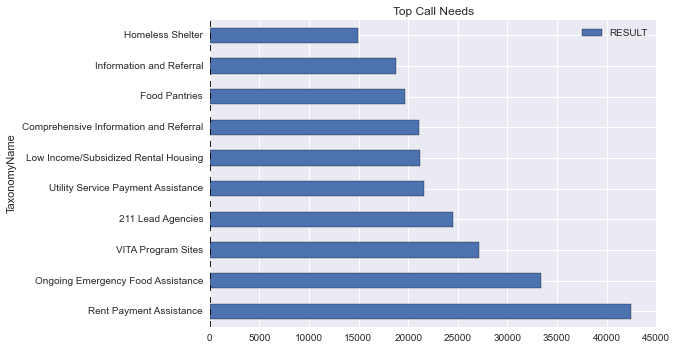

In [18]:
#plot chart of top ten caller needs#
df_merged_for_barchart = df_merged_Tax_nodups.sort(columns='RESULT',ascending=False).head(10)
df_merged_for_barchart.drop(['SINDEX'],axis=1, inplace=True)
df_merged_for_barchart.plot('TaxonomyName', kind='barh', title= 'Top Call Needs')

In [91]:
top3segments = df_merged_Tax_nodups.groupby(df_merged.Dem_Ethnicity).apply(top, column= 'SINDEX', n=3)[['TaxonomyName', 'SINDEX']]
top3segments

TaxonomyName  \
Dem_Ethnicity                                                                                   
African American/Black              606677                       Transitional Housing/Shelter   
                                    614533         Affordable Care Act Information/Counseling   
                                    663055            Senior Housing Information and Referral   
                                    7921                 Comprehensive Job Assistance Centers   
                                    11140                                           Furniture   
                                    548598                                           Bus Fare   
                                    644733                            Brown Bag Food Programs   
                                    586875                                        Cell Phones   
                                    666732                     Gas Service Payment Assistance   
                                    668758       Furniture/Home Furnishings Donation Programs   
Asian                               626885                                Helplines/Warmlines   
                                    551449                               Senior Ride Programs   
                                    36147                                   Clothing Vouchers   
                                    44314                       Child Care Expense Assistance   
                                    624022                     Computer Distribution Programs   
                                    20330        Sober Living Homes for Recovering Alcoholics   
                                    695916                     Recreational Activities/Sports   
                                    613266                       Public Internet Access Sites   
                                    19844                          Interpretation/Translation   
                                    588354        Eviction Prevention Assistance * Low Income   
Caucasian                           31422                                       VITA Programs   
                                    663780                      Low Cost Home Rental Listings   
                                    97991                       Food Stamps/SNAP Applications   
                                    630491                  Section 8 Housing Choice Vouchers   
                                    90691                        Food Pantries * Older Adults   
                                    681417                        Discounted Internet Service   
                                    566115                         Internet Service Providers   
                                    604967                               Home Delivered Meals   
                                    2333                                              Diapers   
                                    13875                      Centers for Independent Living   
...                                                                                       ...   
Other                               605109                             Mental Health Hotlines   
                                    703382                Electric Service Payment Assistance   
                                    682156                                 Consumer Education   
                                    675806                Case/Care Management * Older Adults   
                                    679265                    Federal Tax Collection Agencies   
                                    21139   Low Income/Subsidized Rental Housing * Older A...   
                                    709207                        Adult Psychiatric Hospitals   
                                    69559   Specialized Information and Referral * Substan...   
                                    48087                   Psychiatric Medication Monitoring   
       

In [68]:
from pandas import Categorical
from pandas import value_counts
df_merged_County = df_merged.CountyName_x
df_merged_County.head()

0       Santa Cruz
1    San Francisco
2        San Mateo
3       Santa Cruz
4    San Francisco
Name: CountyName_x, dtype: object

([<matplotlib.patches.Wedge at 0x28e5fb38>,
  <matplotlib.text.Text at 0x3dbdd518>])

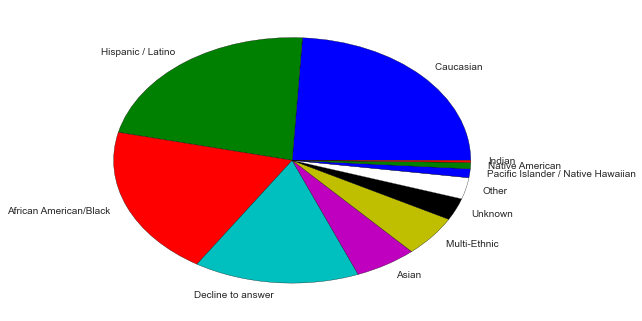

In [93]:
from pylab import pie
df_merged_Ethnicity_freq = value_counts(df_merged.Dem_Ethnicity, normalize=False)
df_merged_Ethnicity_freq
pie(df_merged_Ethnicity_freq, labels=df_merged_Ethnicity_freq.index)